#Hi Welcome to The NoteBook 
###We will implement tokenization API in keras to encode sentences then we will use embedding to make sense of tokens and classify using embeddings 
##Data used : sarcasm dataset


##Download the dataset contains json file
json stands for javascript object notation when you communicate with web it is typically either in json or xml format 

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-07-11 00:53:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 108.177.13.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2020-07-11 00:53:40 (90.0 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



#Import

In [6]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
def get_data(data_path="./"):
  """ data path is where your data resides it ends with .json extention"""
  """ for this particular notebook let's only return the sentences"""
  import json          # for working with json data
  with open(data_path,"r") as f:
    datastore = json.load(f)

  sentences = []
  labels = []
  urls = []
  for item in datastore:
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])
    urls.append(item["article_link"])
  return sentences

DATA_PATH = "/tmp/sarcasm.json"
sentences=get_data(DATA_PATH)

In [3]:
def get_labels(data_path="./"):
  """ data path is where your data resides it ends with .json extention"""
  """ for this particular notebook let's only return the sentences"""
  import json          # for working with json data
  with open(data_path,"r") as f:
    datastore = json.load(f)

  sentences = []
  labels = []
  urls = []
  for item in datastore:
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])
    urls.append(item["article_link"])
  return labels

DATA_PATH = "/tmp/sarcasm.json"
labels=get_labels(DATA_PATH)

#training hyperparameters

In [4]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [5]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [8]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6665 - accuracy: 0.5871 - val_loss: 0.5742 - val_accuracy: 0.7769
Epoch 2/30
625/625 - 2s - loss: 0.4226 - accuracy: 0.8341 - val_loss: 0.3797 - val_accuracy: 0.8404
Epoch 3/30
625/625 - 2s - loss: 0.3069 - accuracy: 0.8769 - val_loss: 0.3523 - val_accuracy: 0.8495
Epoch 4/30
625/625 - 2s - loss: 0.2555 - accuracy: 0.9010 - val_loss: 0.3401 - val_accuracy: 0.8568
Epoch 5/30
625/625 - 2s - loss: 0.2198 - accuracy: 0.9148 - val_loss: 0.3419 - val_accuracy: 0.8566
Epoch 6/30
625/625 - 2s - loss: 0.1938 - accuracy: 0.9251 - val_loss: 0.3519 - val_accuracy: 0.8541
Epoch 7/30
625/625 - 2s - loss: 0.1723 - accuracy: 0.9356 - val_loss: 0.3756 - val_accuracy: 0.8505
Epoch 8/30
625/625 - 2s - loss: 0.1534 - accuracy: 0.9441 - val_loss: 0.3792 - val_accuracy: 0.8533
Epoch 9/30
625/625 - 2s - loss: 0.1389 - accuracy: 0.9503 - val_loss: 0.4020 - val_accuracy: 0.8474
Epoch 10/30
625/625 - 2s - loss: 0.1265 - accuracy: 0.9548 - val_loss: 0.4388 - val_accuracy: 0.8422

#Visualization of training

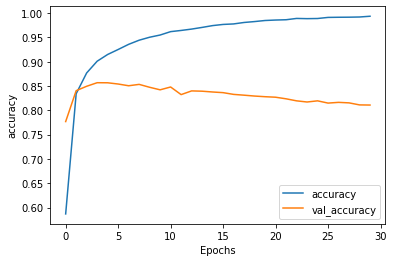

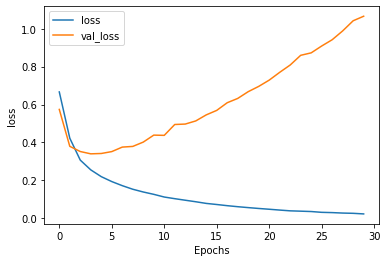

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#reversing words

In [13]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


#Model weights

In [14]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


#visualizations and files

In [15]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [16]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.6968013e-01]
 [4.9753624e-05]]


#Visualization:
follow [this link](https://projector.tensorflow.org/) and upload vec.tsv and meta.tsv to visualization use t-sne as decomposition method

#Written by : SATYAJIT MAITRA
## follow github: https://github.com/MachineLearningWithHuman/
## Email for work : ssatyajitmaitra@gmail.com
##learn with me on youtube: https://www.youtube.com/channel/UCiWd572-4LeH0IqJ5A7LavA/
### please give a star if it helps you 